# Activity 2: Learning the Syntactical Features of Input Samples

<hr/>
<div class="alert alert-success alertsuccess">
[Task]: Implement the function <i>train_tree(data)</i>, that trains a decision tree on the syntactical features of the input samples and their execution outcomes.
</div>

## Introduction: Learning a Decision Tree

Lets import the oracle definition that states weather a bug was present or not from the helper scripts:

In [1]:
from ipynb.fs.full.helper import OracleResult

We will also use `scikit-learn` as the maschine-learning library. We will use the `DecisionTreeClassifier` to learn the syntactical input features that are responsible for the bug-triggering behavior of our Calculator (SUT - SubjectUnderTest). We also use the `tree` module and `graphviz` to visualize the learned decision tree.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree

import graphviz

First, we transform the individual input features (represented as dicts) into a NumPy array. For this example, we use the following four features (`function-sqrt`, `function-cos`, `function-sin`, `number`) to describe an input feature. (Please note that this is an extremely reduced example; this is not the complete list of features that should be extracted from the `CALCULATOR` Grammar.)

The features `function-sqrt`, `function-cos`, `function-sin`state wheater the function _sqrt_, _cos_, or _sin_ was used. A `1`is given, if the sample contains the respective function, otherwise the feature contains a `0`.

For the each <function>(x), the `number` feature describes which value was used for `x`. For instance, the first input `sqrt(-900)` corresponds to 'function-sqrt': 1 and 'number': -900.

In [3]:
# Features for each input, one dict per input
features = [
    {'function-sqrt': 1, 'function-cos': 0, 'function-sin': 0, 'number': -900}, # sqrt(-900)
    {'function-sqrt': 0, 'function-cos': 1, 'function-sin': 0, 'number': 300}, # cos(300)
    {'function-sqrt': 1, 'function-cos': 0, 'function-sin': 0, 'number': -1}, # sqrt(-1)
    {'function-sqrt': 0, 'function-cos': 1, 'function-sin': 0, 'number': -10}, # cos(-10)
    {'function-sqrt': 0, 'function-cos': 0, 'function-sin': 1, 'number': 36}, # sin(36)
    {'function-sqrt': 0, 'function-cos': 0, 'function-sin': 1, 'number': -58}, # sin(-58)
    {'function-sqrt': 1, 'function-cos': 0, 'function-sin': 0, 'number': 27}, # sqrt(27)
]

We define a list of lables (or oracles) that state wheather the specific input file resulted in a bug or not. We use the `OracleResult`-Class to keep everything tidy and clean.

In [4]:
# Labels for each input
oracle = [
    OracleResult.BUG,
    OracleResult.NO_BUG,
    OracleResult.BUG,
    OracleResult.NO_BUG,
    OracleResult.NO_BUG,
    OracleResult.NO_BUG,
    OracleResult.NO_BUG
]

# Transform to numpy array
vec = DictVectorizer()
X = vec.fit_transform(features).toarray()

Using the feature array and labels, we can now train a decision tree classifier as follows:

In [5]:
# Fix the random state to produce a deterministic result (for illustration purposes only)
clf = DecisionTreeClassifier(random_state=10)

# sci-kit learn requires an array of strings
oracle_clean = [str(c) for c in oracle]
clf = clf.fit(X, oracle_clean)

Let's have a look at the learned decision tree:

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=vec.get_feature_names_out(),  
                                class_names=["BUG", "NO BUG"],  
                                filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  

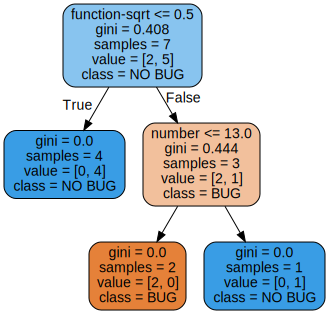

In [7]:
graph

We can see that our initial hypothesis is that the feature `function-sqrt` must be greater than 0.5 (i.e., present) and the feature `number` must be less or equal than 13 in order to produce a bug. The decision rule is not yet perfect, thus we need to refine our decision tree!

## Activity 2: Decision Tree Learner

<hr/>
<div class="alert alert-success alertsuccess">
[Task]: Implement the function <i>train_tree(data)</i>, that learns a decision tree on the given data.
</div>

For _Alhazen's_ second activity (Train Classification Model), your are required to write a function `train_tree(data)` that trains a decision tree on a given data frame. `train_tree(data)` should return the learned decision tree.

```python

def train_tree(data: pandas.core.frame.DataFrame) -> sklearn.tree._classes.DecisionTreeClassifier

```

**INPUT**:
the function requires the following parameter:
- data: a pandas dataframe containing the parsed and extracted features and the outcome of the executed input sample (oracle). For instance, the data frame may look similar to this:

| feature_1     | feature_2     | ...    |oracle|
| ------------- |-------------|-------------|-----|
| 1     | 0 | ...| 'BUG' |
| 0     | 1 | ...| 'NO_BUG' |

<div class="alert alert-danger" role="alert">
Each row of data['oracle'] is of type OracleResult. However, sci-kit learn requires an array of strings. Convert them to learn the decision tree.
</div>

**OUTPUT**: the function should return a learned decision tree of type _sklearn.tree._classes.DecisionTreeClassifier_

In [10]:
from sklearn import tree
from pandas import DataFrame

def train_tree(data: DataFrame)-> tree._classes.DecisionTreeClassifier:
    
    # write your code here
    data = DataFrame()
    features = data['feature_1', 'feature_2']
    oracle = np.array(data['oracle'])
    
    X = pandas.DataFrame.from_records(features)
    
    clf = DecisionTreeClassifier(random_state=10)
    clf = clf.fit(X, oracle)
    
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=vec.get_feature_names_out(),  
                                    class_names=["BUG", "NO BUG"],  
                                    filled=True, rounded=True)  
    graph = graphviz.Source(dot_data)  
    return graph
    #raise NotImplementedError("Func. train tree: Function not Implemented")